<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [2]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [3]:

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

In [4]:
# Preprocess input data
'''standard our data values to the range [-1, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5

In [5]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# 6. Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])


# 7. Fit model on training data
history = model.fit(X_train, y_train,
          epochs=200, batch_size=256, validation_split=0.2)


Epoch 1/200
11/11 [==============================] - 35s 296ms/step - loss: 2.0855 - sparse_categorical_accuracy: 0.3933 - val_loss: 2.0395 - val_sparse_categorical_accuracy: 0.7671
Epoch 2/200
11/11 [==============================] - 2s 191ms/step - loss: 0.5649 - sparse_categorical_accuracy: 0.8258 - val_loss: 1.8229 - val_sparse_categorical_accuracy: 0.7729
Epoch 3/200
11/11 [==============================] - 2s 188ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.8676 - val_loss: 1.8079 - val_sparse_categorical_accuracy: 0.3757
Epoch 4/200
11/11 [==============================] - 2s 182ms/step - loss: 0.2747 - sparse_categorical_accuracy: 0.9229 - val_loss: 1.9082 - val_sparse_categorical_accuracy: 0.2729
Epoch 5/200
11/11 [==============================] - 2s 185ms/step - loss: 0.2077 - sparse_categorical_accuracy: 0.9428 - val_loss: 2.0446 - val_sparse_categorical_accuracy: 0.2357
Epoch 6/200
11/11 [==============================] - 2s 184ms/step - loss: 0.1637 - sparse_cat

11/11 [==============================] - 2s 184ms/step - loss: 0.0068 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9714
Epoch 47/200
11/11 [==============================] - 2s 182ms/step - loss: 0.0059 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_sparse_categorical_accuracy: 0.9700
Epoch 48/200
11/11 [==============================] - 2s 188ms/step - loss: 0.0051 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_sparse_categorical_accuracy: 0.9729
Epoch 49/200
11/11 [==============================] - 2s 184ms/step - loss: 0.0046 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_sparse_categorical_accuracy: 0.9729
Epoch 50/200
11/11 [==============================] - 2s 186ms/step - loss: 0.0052 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0900 - val_sparse_categorical_accuracy: 0.9700
Epoch 51/200
11/11 [==============================] - 2s 191ms/step - loss: 0.0071 - sparse_categorical

11/11 [==============================] - 2s 193ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_sparse_categorical_accuracy: 0.9757
Epoch 92/200
11/11 [==============================] - 2s 189ms/step - loss: 0.0020 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0710 - val_sparse_categorical_accuracy: 0.9757
Epoch 93/200
11/11 [==============================] - 2s 182ms/step - loss: 0.0019 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0743 - val_sparse_categorical_accuracy: 0.9757
Epoch 94/200
11/11 [==============================] - 2s 216ms/step - loss: 0.0019 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_sparse_categorical_accuracy: 0.9757
Epoch 95/200
11/11 [==============================] - 2s 223ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_sparse_categorical_accuracy: 0.9757
Epoch 96/200
11/11 [==============================] - 2s 194ms/step - loss: 0.0015 - sparse_categorical

Epoch 136/200
11/11 [==============================] - 2s 190ms/step - loss: 0.0011 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0766 - val_sparse_categorical_accuracy: 0.9757
Epoch 137/200
11/11 [==============================] - 2s 184ms/step - loss: 6.8437e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_sparse_categorical_accuracy: 0.9757
Epoch 138/200
11/11 [==============================] - 2s 197ms/step - loss: 8.7062e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0794 - val_sparse_categorical_accuracy: 0.9757
Epoch 139/200
11/11 [==============================] - 2s 194ms/step - loss: 8.6511e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_sparse_categorical_accuracy: 0.9743
Epoch 140/200
11/11 [==============================] - 2s 199ms/step - loss: 7.8327e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9757
Epoch 141/200
11/11 [==============================] - 2s 186ms/step 

Epoch 180/200
11/11 [==============================] - 2s 190ms/step - loss: 4.3862e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0787 - val_sparse_categorical_accuracy: 0.9771
Epoch 181/200
11/11 [==============================] - 2s 190ms/step - loss: 6.0768e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_sparse_categorical_accuracy: 0.9786
Epoch 182/200
11/11 [==============================] - 2s 188ms/step - loss: 4.8166e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0766 - val_sparse_categorical_accuracy: 0.9786
Epoch 183/200
11/11 [==============================] - 2s 186ms/step - loss: 4.6304e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0777 - val_sparse_categorical_accuracy: 0.9771
Epoch 184/200
11/11 [==============================] - 2s 185ms/step - loss: 4.6769e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0794 - val_sparse_categorical_accuracy: 0.9771
Epoch 185/200
11/11 [==============================] - 2s 188ms/s

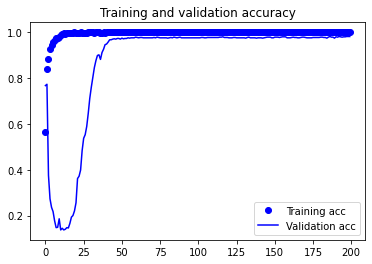

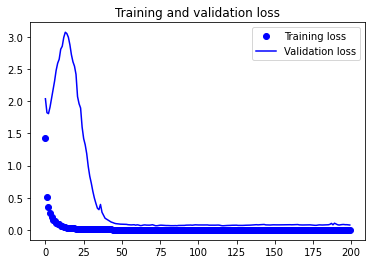

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()